In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.fashion_mnist
#train_labels est un nombre représentant une classe
#L'ordinateur est plus performant avec les nombres qu'avec les langues.


Load Data

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Data visualisation

[[  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143
    9   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197
  206 188 126  17   0   0   0   0   0   0]
 [  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179
  183 189 195 185  82   0   0   0   0   0]
 [  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174
  175 175 177 183 188  12   0   0   0   0]
 [  0   0   0   0  25 194 180 178 174 184 187 189 187 184 181 189 200 197
  193 190 178 175 194  90   0   0   0   0]
 [  0   0   0   0  42 218 191 197 208 204 211 209 210 212 211 214 215 213
  214 211 211 191 200 158   0   0   0   0]
 [  0   0   0   0  88 221 215 217 219 211 185 150 118 107  99  88  83  90
  135 212 203 207 219 169   0   0   0   0]
 [  0   0   0   0   0  27 118 162  40   0   0   0  10  19  28  39  47  36
    0   0 203 230 220 203   0   0   0   0]
 [  0   0   0   0 138 136  71  69  54 216 217 203 184 168 163 16

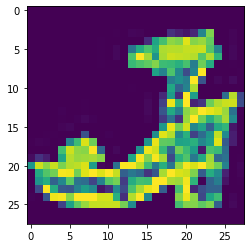

In [4]:
plt.imshow(training_images[60])
print(training_images[5])

Normalization

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.08627451]
  [0.34509804]
  [0.7372549 ]
  [0.6745098 ]
  [0.51764706]
  [0.49019608]
  [0.55294118]
  [0.78039216]
  [0.56078431]
  [0.03529412]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.        ]
  [0.        ]
  [0.07843137]
  [0.51372549]
  [0.78039216]
  [0.80784314]
  [0.76862745]
  [0.79215686]
  [0.94901961]
  [1.        ]
  [1.        ]
  [0.98039216]
  [0.87058824]
  [0.77254902]
  [0.80784314]
  [0.7372549 ]
  [0.49411765]
  [0.06666667]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.        ]
  [0.1372549 ]
  [0.83921569]
  [0.74901961]
  [0.71764706]
  [0.69803922]
  [0.6

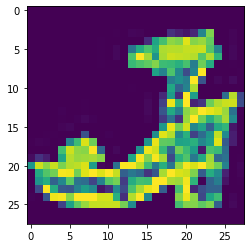

In [5]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0
plt.imshow(training_images[60])
print(training_images[5])

Conception du modèle :
softmax: on utilise softmax car on a des resultats catégoriel (10 catégorie) softmax permet de fournis un tableau avec 10 élements et  mettre à 1 la probabilités la plus élevé et le reste à 0

In [6]:
model = tf.keras.models.Sequential([
                            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                            tf.keras.layers.MaxPooling2D(2, 2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Building the model

In [7]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
______________________________________________

In [8]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.3344 - accuracy: 0.9162


[0.3344401717185974, 0.9161999821662903]